In [20]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from matplotlib.lines import Line2D
from warnings import filterwarnings
sns.set_style('whitegrid')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon-top-50-bestselling-books-2009-2019/bestsellers with categories.csv


Input data

In [8]:
df_book = pd.read_csv("/kaggle/input/amazon-top-50-bestselling-books-2009-2019/bestsellers with categories.csv")

In [9]:
df_book.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [46]:
# Handle duplicates
duplicate_rows_data = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape)

number of duplicate rows:  (0, 7)


In [10]:
df_book.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


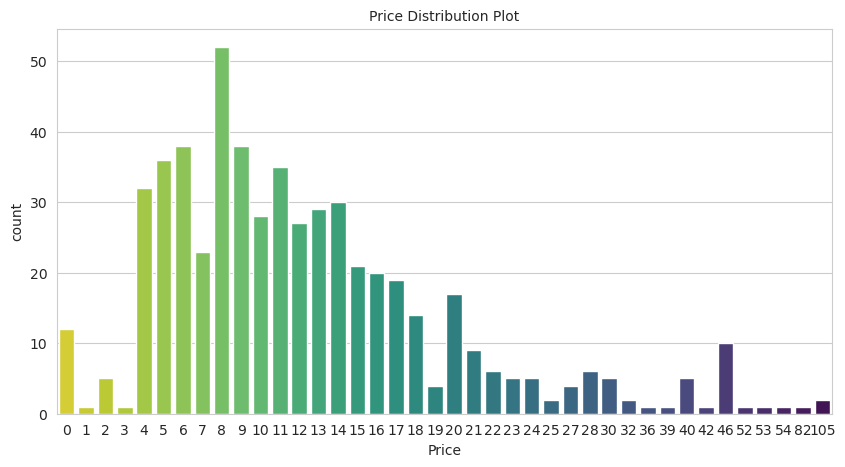

In [29]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['Price'],palette='viridis_r')
plt.title('Price Distribution Plot',fontsize=10)
plt.show()

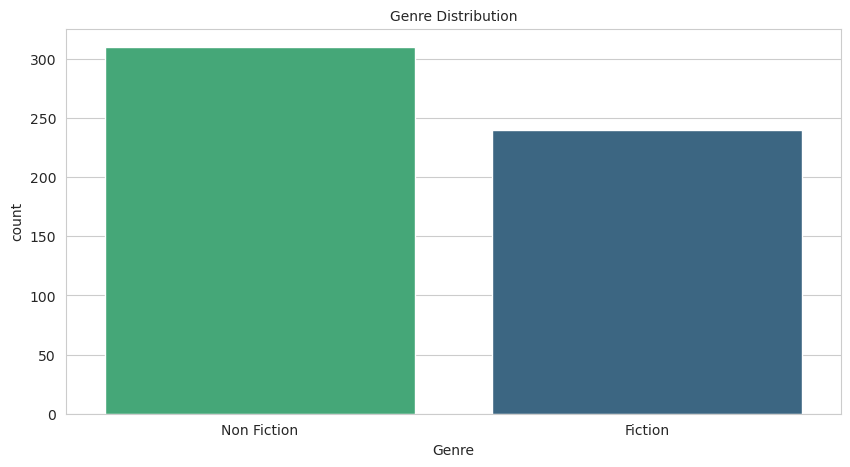

In [48]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['Genre'],palette='viridis_r')
plt.title('Genre Distribution',fontsize=10)
plt.show()

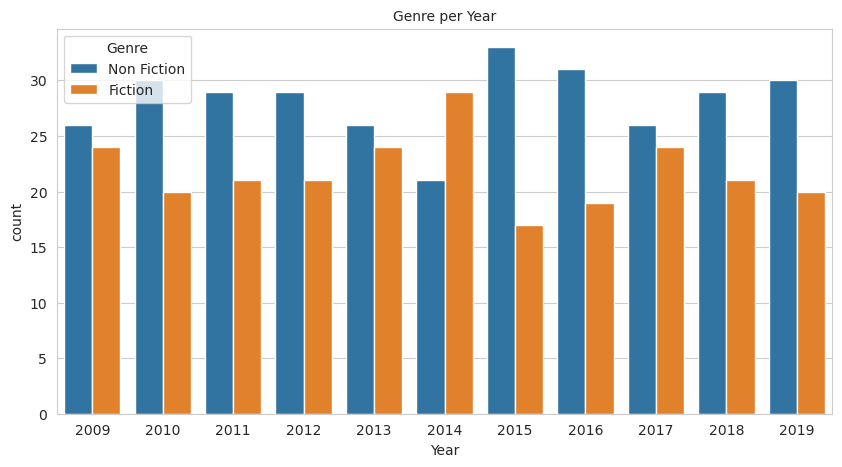

In [54]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Year', hue='Genre')
plt.title('Genre per Year',fontsize=10)
plt.show()

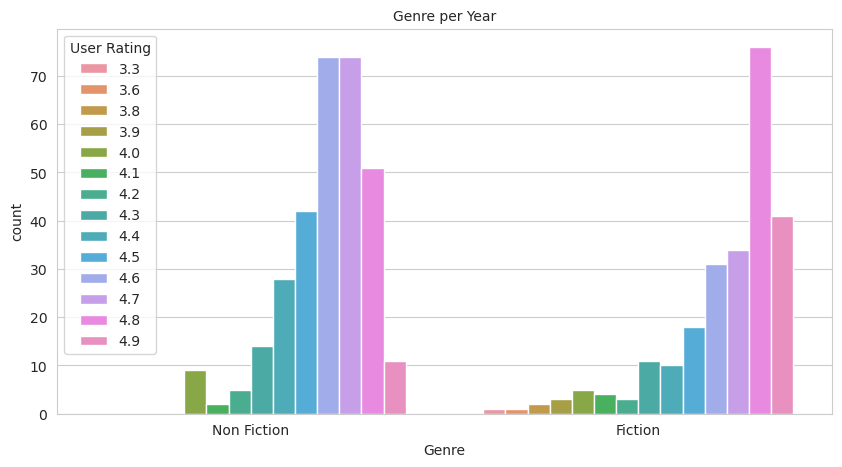

In [64]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Genre', hue='User Rating')
plt.title('Genre per Year',fontsize=10)
plt.show()

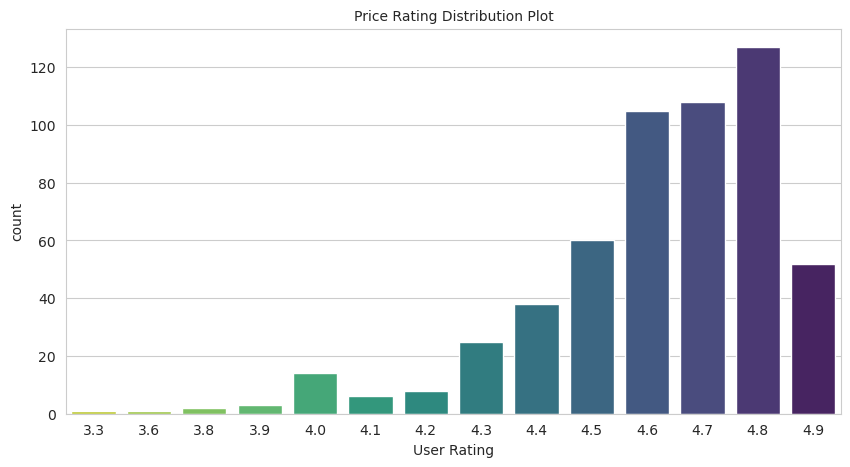

In [28]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['User Rating'],palette='viridis_r')
plt.title('User Rating Distribution Plot',fontsize=10)
plt.show()

<Axes: xlabel='Genre', ylabel='Price'>

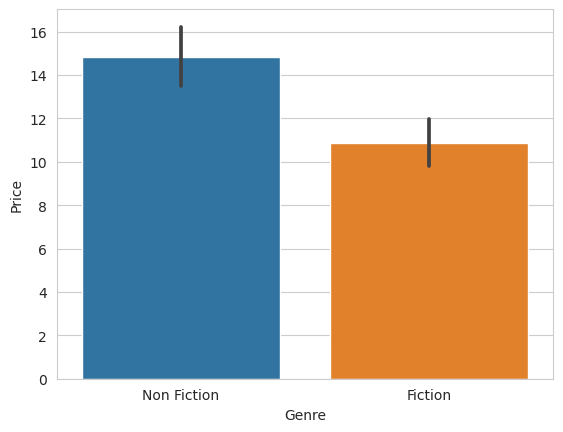

In [33]:
sns.barplot( data = df , x = 'Genre', y = 'Price' )

<Axes: xlabel='User Rating', ylabel='Price'>

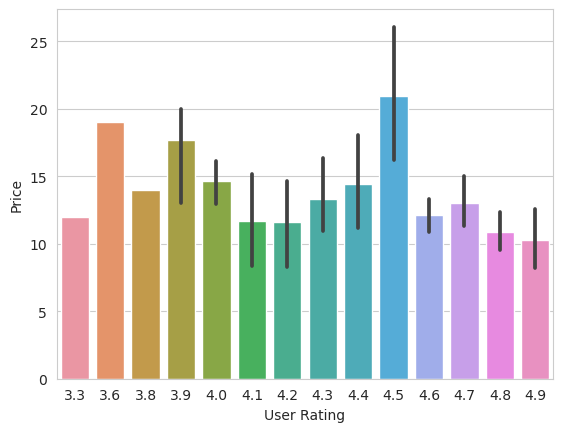

In [35]:
sns.barplot( data = df , x = 'User Rating', y = 'Price' )

In [41]:
brand_price = df_book[["Genre","Price"]].groupby(["Genre"], as_index = False).mean().sort_values(by = "Price", ascending = False)
brand_price

,Genre,Price
1,Non Fiction,14.841935
0,Fiction,10.850000


In [42]:
brand_price = df_book[["Year","Price"]].groupby(["Year"], as_index = False).mean().sort_values(by = "Price", ascending = False)
brand_price

,Year,Price
0,2009,15.40
3,2012,15.30
2,2011,15.10
5,2014,14.64
4,2013,14.60
1,2010,13.48
7,2016,13.18
8,2017,11.38
9,2018,10.52
6,2015,10.42


In [44]:
brand_price = df_book[["Name","Price"]].groupby(["Name"], as_index = False).mean().sort_values(by = "Price", ascending = False)
brand_price

,Name,Price
56,Diagnostic and Statistical Manual of Mental Di...,105.0
307,The Twilight Saga Collection,82.0
112,Hamilton: The Revolution,54.0
228,The Book of Basketball: The NBA According to T...,53.0
115,Harry Potter Paperback Box Set (Books 1-7),52.0
...,...,...
159,Little Blue Truck,0.0
92,Frozen (Little Golden Book),0.0
139,JOURNEY TO THE ICE P,0.0
235,The Constitution of the United States,0.0


In [45]:
Counter(df.drop_duplicates('Name')['Author']).most_common()[0]

('Jeff Kinney', 12)

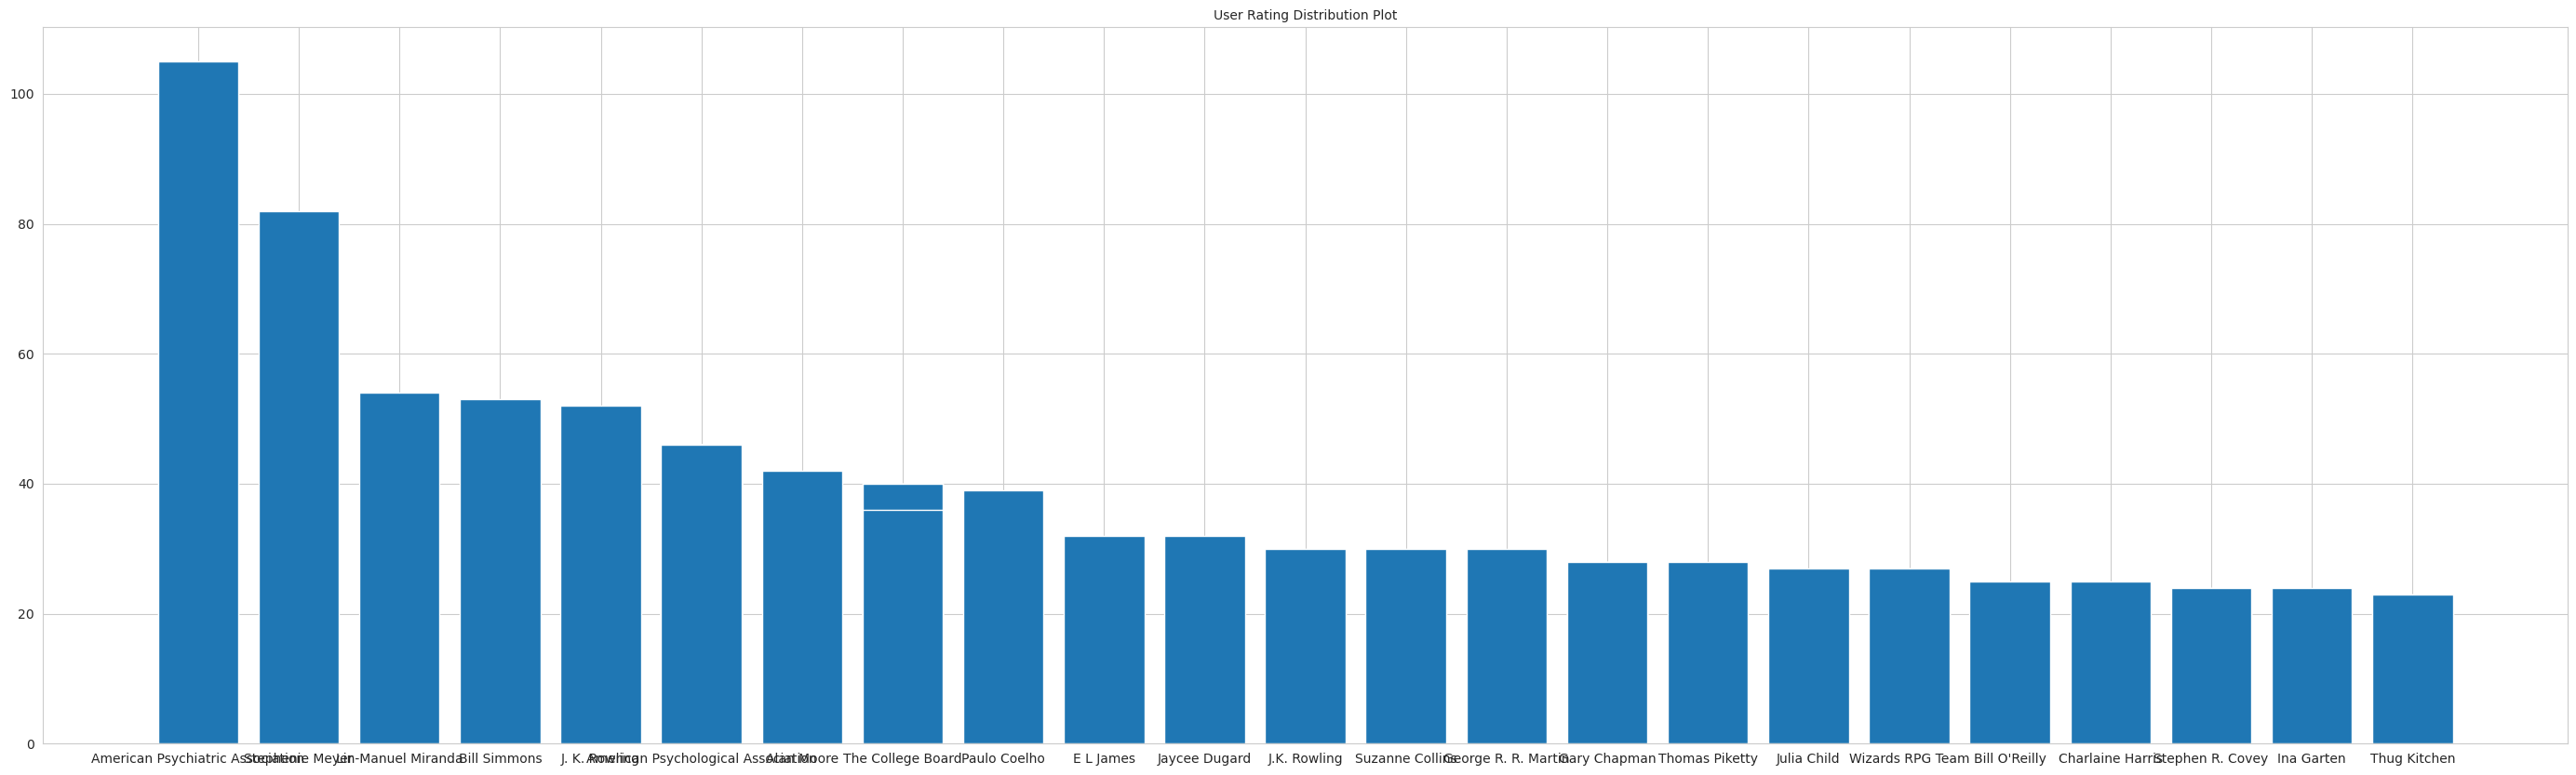

In [73]:
plt.figure(figsize=(35,10))
df_sort=df.sort_values(by=['Price'],ascending=False)
x=df_sort[:50]['Author'].values
y=df_sort[:50]['Price'].values
plt.bar(x,y)
plt.title('User Rating Distribution Plot',fontsize=10)
plt.show()

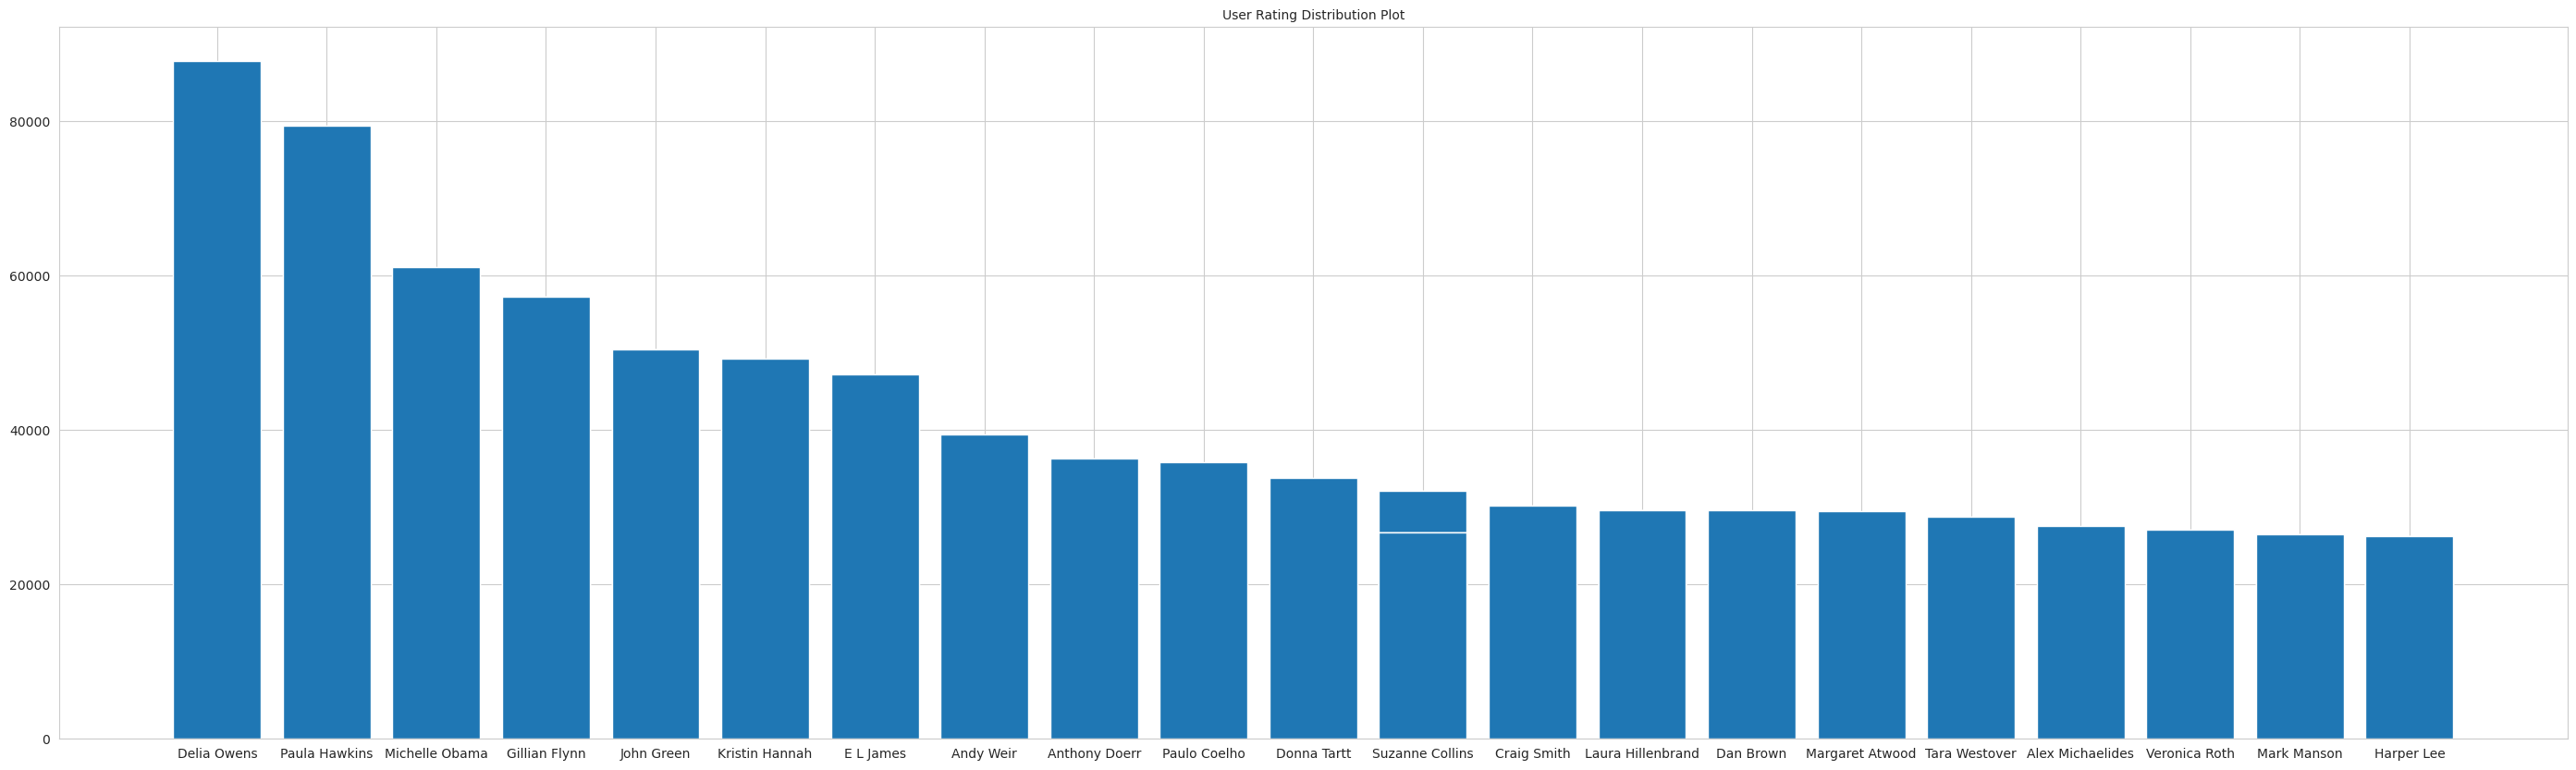

In [77]:
plt.figure(figsize=(35,10))
df_sort=df.sort_values(by=['Reviews'],ascending=False)
x=df_sort[:50]['Author'].values
y=df_sort[:50]['Reviews'].values
plt.bar(x,y)
plt.title('User Rating Distribution Plot',fontsize=10)
plt.show()